# Measure intensity along a line or in a box

Using the function ```splitmask.scan_intensities``` you can create a kymograph along a line with a given diameter and for one or multiple channels.

In [1]:
#%load_ext autoreload
#%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from microfilm.dataset import MultipageTIFF, Nparray
from microfilm.microplot import microshow
from microfilm.microplot import Micropanel
from roidynamics import splitmask

So that output dimensions are clear, we use here a syhtehtic dataset. It's composed of a 2-channel image with a constant vertical signal in channel 1 and a horizontal signal moving downwards in channel 2. First we generate the data:

In [3]:
image = np.zeros((2,20,30,30), dtype=np.uint8)
for t in range(10):
    image[1,t,t:t+2,:] = 1
image[0,:,:,4:7] = 1

im_data = Nparray(image)

We can display the first ten frames of this series:

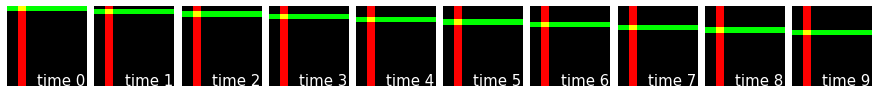

In [4]:
microp = Micropanel(1,10, margin=0.1, figsize=(12,12))
for i in range(10):
    microshow([im_data.load_frame('0',1),im_data.load_frame('1',i)], ax=microp.ax[0,i], label_text=f'time {i}', label_location='lower right')

Then we define a line along which we want to measure the intensity. We have to specify a starting point (```src```) and an endpoint (```dst```). If we want to measure the intensity within a *box*, we can specify a ```box_width``` which corresponds to the short-length of the rectangular box. If we consider a box, we have to specify how we want to project the signal perpendicularly to the line. By default it's an average, but one can specify other Numpy function like ```np.max```.

In [5]:
src = [8,3]
dst = [4,9]
box_width = 3

Now we can compute the intensity over time in the box defined by the above parameters using the ```splitmask.scan_intensities``` function. We can measure intensity directly in one or more channels by specifying either a single channel or a list of them. The function also returns the coordinates of the chosen box, so that it can be plotted if necessary:

In [6]:
scaned, rectangle = splitmask.scan_intensities(
    time_image=im_data, channels=im_data.channel_name, src=src, dst=dst,
    box_width=box_width, reduce_func=np.sum)

Let's first display the chosen box to simplify the interpretation of the kymograph:

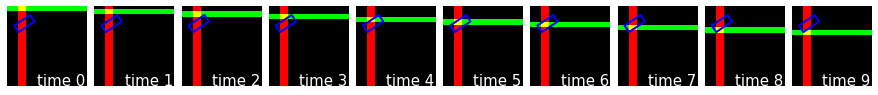

In [7]:
microp = Micropanel(1,10, margin=0.1, figsize=(12,12))
for i in range(10):
    microshow([im_data.load_frame('0',1),im_data.load_frame('1',i)], ax=microp.ax[0,i], label_text=f'time {i}', label_location='lower right')
    microp.ax[0,i].plot(rectangle[:,1], rectangle[:,0], color='blue', linestyle='-', linewidth=2)

We see that our box permanently crosses the red signal and that the green signal moves across the box over time.

Let's now look at the kymograph in ```scaned```:

In [8]:
scaned

<xarray.DataArray (channel: 2, time: 20, profile: 9)>
array([[[0.5547002 , 1.9452998 , 2.9452998 , 3.        , 2.4452998 ,
         1.0547002 , 0.0547002 , 0.        , 0.        ],
        [0.5547002 , 1.9452998 , 2.9452998 , 3.        , 2.4452998 ,
         1.0547002 , 0.0547002 , 0.        , 0.        ],
        [0.5547002 , 1.9452998 , 2.9452998 , 3.        , 2.4452998 ,
         1.0547002 , 0.0547002 , 0.        , 0.        ],
        [0.5547002 , 1.9452998 , 2.9452998 , 3.        , 2.4452998 ,
         1.0547002 , 0.0547002 , 0.        , 0.        ],
        [0.5547002 , 1.9452998 , 2.9452998 , 3.        , 2.4452998 ,
         1.0547002 , 0.0547002 , 0.        , 0.        ],
        [0.5547002 , 1.9452998 , 2.9452998 , 3.        , 2.4452998 ,
         1.0547002 , 0.0547002 , 0.        , 0.        ],
        [0.5547002 , 1.9452998 , 2.9452998 , 3.        , 2.4452998 ,
         1.0547002 , 0.0547002 , 0.        , 0.        ],
        [0.5547002 , 1.9452998 , 2.9452998 , 3.        , 2.4452998 ,
         1.0547002 , 0.0547002 , 0.        , 0.        ],
        [0.5547002 , 1.9452998 , 2.9452998 , 3.        , 2.4452998 ,
         1.0547002 , 0.0547002 , 0.        , 0.        ],
        [0.5547002 , 1.9452998 , 2.9452998 , 3.        , 2.4452998 ,
         1.0547002 , 0.0547002 , 0.        , 0.        ],
...
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        ]]])
Dimensions without coordinates: channel, time, profile

It is an xarray with dimensions ```channel```, ```time``` and ```profile```, the latter corresponding to the box or line length. These data can now be plotted as a kymograph, an image with dimension time x profile (since this is an xarray, we need to convert it to Numpy for ```microfilm```. Note: microfilm will be updated to be able to plot xarrays):

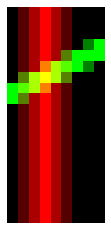

In [9]:
microshow(scaned.values.astype(np.uint16));

Each line corresponds to a time and each column represents a point along the box. We see that the result corresponds to our expectations: the red signal which doesn't move is constant in the kymograph, while the green signal moves through the box and then disappears.